## AI Project
#### Team GLaDOS
#### Members :
#### Meet Manoj Maratha (19190) 
#### Marut Priyadarshi (19191)
#### Mohammad Anish (19195)


### Importing modules

In [1]:
import numpy as np
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt

### Defining Functions

#### For Creating Population

In [20]:
def first_population(sizePopulation, numNodes):
  '''
  This functions creates the first population on which genetic algorithm is applied
  Variables :
  sizePopulation : Number of population to be generated
  numNodes : Index of nodes in the route
  '''
  pop = []
  for i in range(0, sizePopulation):
    pop.append(route_create(numNodes))
  return pop

#### Route Creation

In [3]:
def route_create(numNodes):
  '''
  This function outputs a route after taking nodes value
  Variables :

  numNodes : Index of nodes in the route
  '''
  pop=set(np.arange(1,numNodes+1,dtype=int))
  route = random.sample(pop,numNodes)
  route.insert(0,0)
  route.append(0)
  return route

#### Fitness value

In [4]:
def fitness_value(route, nodeList):
  '''
  This function gives fitness value to each route which is calculated using function "distance"
  Variable :

  route : The route for which we want the fitness value
  nodeList : The nodeList (dataframe) we provided which has longtitude and latitude of each node
  '''
  score = distance(dump, nodeList[route[1]-1])
  for i in range(2,len(route)-1):
    prev = int(route[i-1])-1
    next = int(route[i])-1
    score = score + distance(nodeList[prev], nodeList[next])
  score = score + distance(dump, nodeList[route[-1]])
  return score

#### Ranking of routes

In [5]:
def ranking(pop, nodeList):
  '''
  This function gives ranking of each route in a population.
  Variable :
  pop : population given
  nodeList : The nodeList (dataframe) we provided which has longtitude and latitude of each node
  '''
  fit = {}
  for i in range(len(pop)):
    fit[i] = fitness_value(pop[i],nodeList)
  return sorted(fit.items(), key = operator.itemgetter(1), reverse = False)

#### Calculating distance between 2 nodes

In [6]:
def distance(i,j):
  '''
  This function is used to calculate Euclidean distance between the two points.
  Variable :
  i : The first node
  j : The second node
  '''
  return np.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2)

#### Next generation creation

In [7]:
def next_gen(nodeList,currPop,mutationProb,selectSize):
  '''
  This function generates the next generation of the genetic algorithm.
  Here we do crossover and mutation.
  The output of this function is the next generation.
  Variable :

  nodeList :  The nodeList (dataframe) we provided which has longtitude and latitude of each node.
  currPop : The current population which will be breeded and mutated to make new generation.
  mutationProb : The porbability of there being a mutation at a node in a route.
  selectSize : The amount of route choosen from the ranked routes
  '''
  popRank=ranking(currPop,nodeList)

  selectRes=select(popRank,selectSize)

  pool=mating_pool(currPop,selectRes)

  child=breed_pop(pool)

  nextGen=mutate_pop(child,mutationProb)
  return nextGen

#### Selecting routes to do crossover

In [8]:
def select(popRanked, selectSize):
  '''
  This function provides the top "selectSize" amount of routes from the given ranked population.
  The output is the selected amount of population.
  Variable : 

  popRanked : The population which is ranked according to fitness value.
  selectSize : The amount of values we take from the ranked population.
  '''
  selectRes=[]
  result=[]
  for i in popRanked:
      result.append(i[0])
  for i in range(0,selectSize):
      selectRes.append(result[i])

  return selectRes

#### Generation of mating pool

In [9]:
def mating_pool(pop, selectRes):
  '''
  This function gives mating pool of routes for breeding.
  Variable :

  pop : The provided population.
  selectRes : The selected population.
  '''
  matingPool = []
  for i in range(0, len(selectRes)):
      index = selectRes[i]
      matingPool.append(pop[index])
  return matingPool

#### Generation of breeding population

In [10]:
def breed_pop(pool):
  '''
  This function gives the breeded population as the output.
  Variable : 

  pool : The mating pool which we have obtained.
  '''
  child=[]

  # Here we are just supplying the route without the dump node
  for i in range(len(pool)):
    child.append(crossover(pool[i][1:-1]))
  
  # Now we are again adding the dump node to each route in the child 
  for i in range(len(child)):
    child[i].insert(0, 0)
    child[i].append(0)
  return child

#### Crossover function

In [23]:
def crossover(route):
  '''
  This function does the cross over of a node. 
  Variable :

  route : The route given
  '''
  child=[]
  childSec1=[]
  childSec2=[]


  geneA=int(random.random()* len(route))
  geneB=int(random.random()* len(route))

  start_gene=min(geneA,geneB)
  end_gene=max(geneA,geneB)

  for i in range(start_gene,end_gene):
    childSec1.append(route[i])
    
  childSec2 = [item for item in route if item not in childSec1]
  child = childSec1 + childSec2
  return child

#### Producing population after mutation

In [12]:
def mutate_pop(child,mutationProb):
  '''
  This function gives the final population after if any mutation is to be applied.
  Variable :

  child : The child obtained after crossover.
  mutationProb : The probability of mutation.
  '''
  new_generation=[]
  for i in child:
    muated_child=mutate(i,mutationProb)
    new_generation.append(muated_child)
  return new_generation

#### Mutation function

In [13]:
def mutate(route,probablity):
  '''
  This function is does the mutation in the population based on the probablity of mutation.
  For mutating shuffling of the nodes is used.
  Variable :

  route : The route we need to mutate.
  probability : the probability of mutation.
  '''
  
  route1=np.array(route[1:-1])
  for swaping_p in range(len(route1)):
    if(random.random() < probablity):
      swapedWith = np.random.randint(0, len(route1))
      
      temp1=route1[swaping_p]
      
      temp2=route1[swapedWith]
      route1[swapedWith]=temp1
      route1[swaping_p]=temp2
    
  route = np.ones(len(route1) + 2, dtype=int)
  route[0] = 0
  route[-1] = 0
  for i in range(len(route1)):
    route[i + 1] = route1[i]
  return route

## Genetic Algorithm

In [21]:
def genetic_algorithm(nodeList,popSize=1000,selectSize=75,mutationProb=0.01,genNum=2000):
  '''
  This is the main genetic algorithm. This does all the calculation and gives us the final results.
  Variable :

  nodeList : The nodeList (dataframe) we provided which has longtitude and latitude of each node.
  popSize : The amount of population we are creating. Default is "1000".
  selectSize : The number of top ranked population we are selecting. Default is "75".
  mutationProb : The probability of mutation. Default is "0.01".
  genNum : The amount of generation to do calculation for. The genetic algorithm will be ran this many times. Default is "2000".
  '''
  pop=[]
  progress = []

  Number_of_cities=len(nodeList)

  population=first_population(popSize,Number_of_cities)
  progress.append(ranking(population,nodeList)[0][1])
  print(f"initial route distance {progress[0]}")
  print(f"initial route {population[0]}")
  for i in range(0,genNum):
    pop = next_gen(nodeList,population,mutationProb,selectSize)
    progress.append(ranking(pop,nodeList)[0][1])


  rank_=ranking(pop,nodeList)[0]
  if rank_[1] < progress[0]:
    print(f"\nBest Route :{pop[rank_[0]]} ")
    print(f"\nBest route distance {rank_[1]}\n\n")
  else:
    print('\nThe original route is better than the best route found at end of the algorithm.\n\n')
  plt.plot(progress)
  plt.ylabel('Distance')
  plt.xlabel('Generation')
  plt.title('Progress of Genetic Algorithm') 
  plt.show()
  return rank_, pop

# Execution

### Creating a data frame representing nodes and how fill they are

In [15]:
df = pd.read_csv('/content/node.csv')
df = df.set_index('Index',drop=True)

In [16]:
fill = [0]
for i in range(len(df)-1):
  fill.append(random.random())
df.insert(loc=2,column='Fill Ratio', value=fill)
df

,X,Y,Fill Ratio
Index,,,
Node0,76.743901,30.758091,0.000000
Node1,76.791451,30.759861,0.584273
Node2,76.769650,30.746142,0.086572
Node3,76.779263,30.733453,0.945323
Node4,76.807587,30.741716,0.946410
Node5,76.775658,30.758534,0.618993
Node6,76.733429,30.750715,0.765178
Node7,76.783898,30.709399,0.007041
Node8,76.768105,30.716631,0.799865


### Selecting nodes which is filled more that 50%

In [17]:
dff = df[df.iloc[:,2] > 0.50]

### Creating a list containing co-ordinates of the node

In [18]:
nodeList = []
for i in range(len(dff)):
  x = dff.iloc[i,0]
  y = dff.iloc[i,1]
  nodeList.append((x,y))

# Dump is the location where we dump the trash. It is denoted by '0' in the route section.
dump = df.iloc[0,[0,1]]
print(f'Number of nodes selected : {len(nodeList)}')

Number of nodes selected : 13


#### Implementation

initial route distance 0.5657334651911556
initial route [0, 9, 8, 4, 12, 2, 3, 13, 6, 7, 10, 1, 11, 5, 0]

The original route is better than the best route found at end of the algorithm.




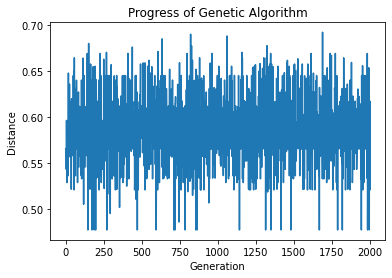

In [24]:
rank_,pop=genetic_algorithm(nodeList=nodeList)